Texto https://medium.com/@thedatatwins/mastering-venn-diagrams-in-python-ee1f2f4d4c3

In [3]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

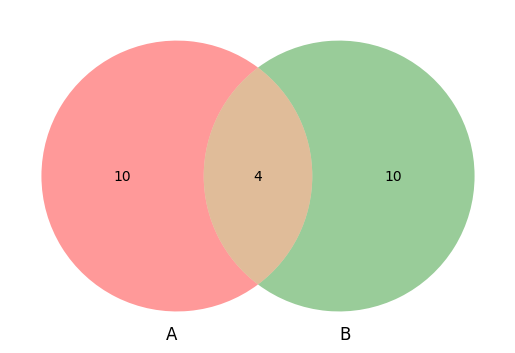

In [4]:
venn2(subsets=(10, 10, 4), set_labels=('A', 'B'))
plt.show()

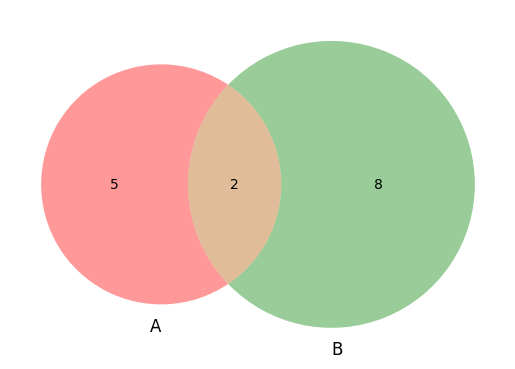

In [5]:
venn2(subsets=(5, 8, 2), set_labels=('A', 'B'))
plt.show()

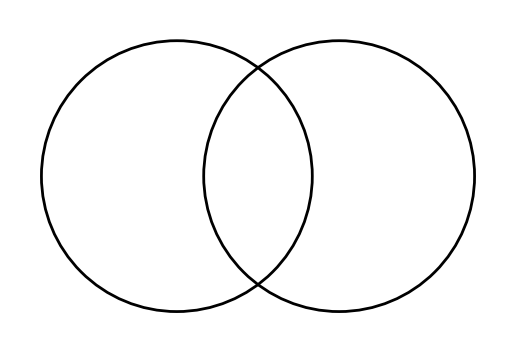

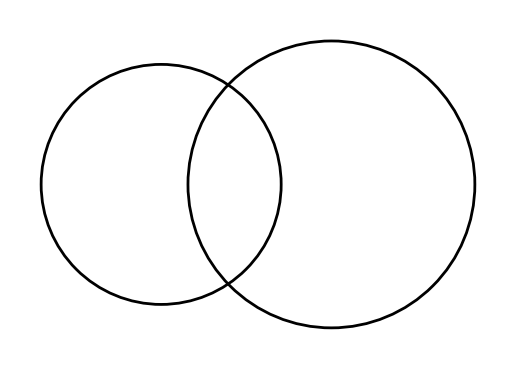

In [6]:
from matplotlib_venn import venn2_circles

venn2_circles(subsets=(10, 10, 4))

plt.show()

venn2_circles(subsets=(5, 8, 2))

plt.show()

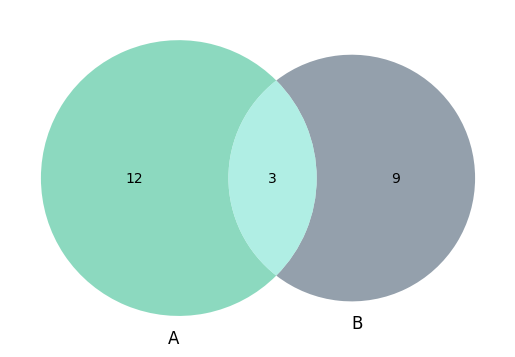

In [7]:
venn2(subsets=(12, 9, 3), set_labels=('A', 'B'), set_colors=('mediumaquamarine', 'slategrey'), alpha=0.75)


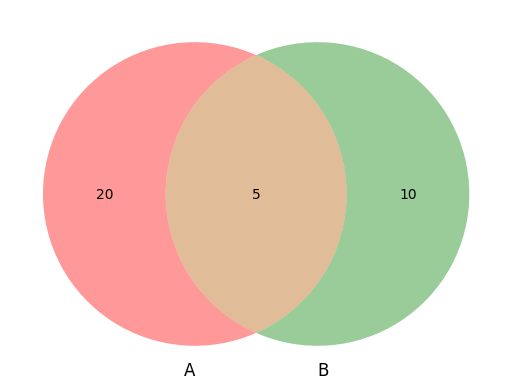

In [18]:
venn2_unweighted(subsets=(20, 10, 5), set_labels=('A', 'B'))


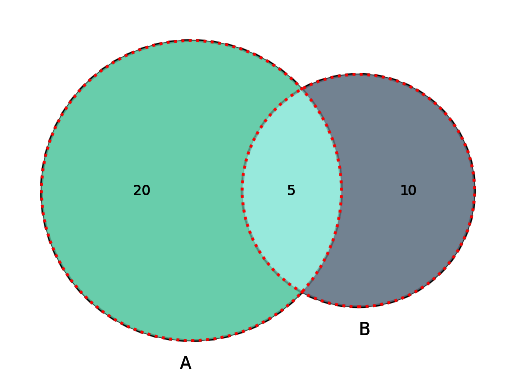

In [9]:
# Venn diagram with solid black lines
venn2(subsets=(20, 10, 5), set_labels=('A', 'B'), set_colors=('mediumaquamarine', 'slategrey'), alpha=0.75)
venn2_circles(subsets=(20, 10, 5), linewidth=1)

# Venn diagram with black dashed lines
venn2(subsets=(20, 10, 5), set_labels=('A', 'B'), set_colors=('mediumaquamarine', 'slategrey'), alpha=0.75)
venn2_circles(subsets=(20, 10, 5), linestyle='dashed', linewidth=2, color='k')

# Venn diagram with dotted red lines
venn2(subsets=(20, 10, 5), set_labels=('A', 'B'), set_colors=('mediumaquamarine', 'slategrey'), alpha=0.75)
venn2_circles(subsets=(20, 10, 5), linestyle='dotted', linewidth=2, color='red')

plt.show()

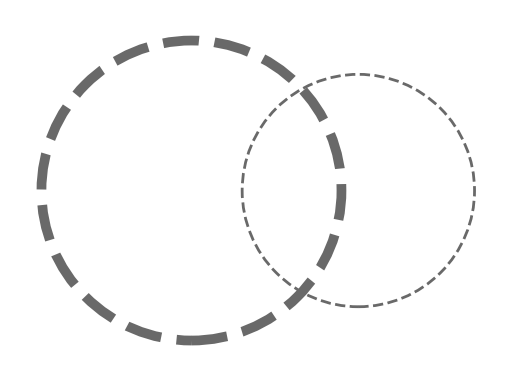

In [10]:
circle = venn2_circles(subsets=(20, 10, 5), linestyle='dashed', linewidth=2, color='dimgrey')
circle[0].set_lw(7.0)
circle[1].set_lw(2.0)

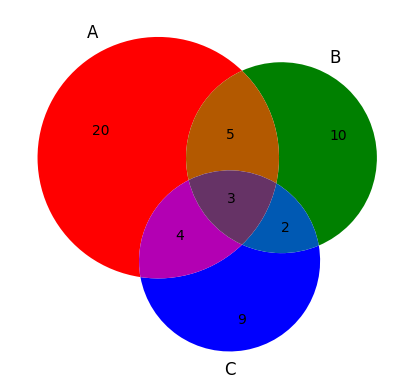

In [23]:
venn3(subsets=(20,10,5,9,4,2,3), set_labels=('A', 'B', 'C'), alpha=1)


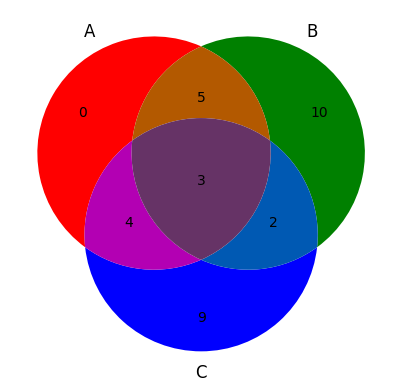

In [30]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Valores ficticios iguales para simular áreas iguales
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1),
          set_labels=('A', 'B', 'C'), alpha=1)

# Sobrescribir textos de los subconjuntos con tus valores reales
valores_reales = (0, 10, 5, 9, 4, 2, 3)
for text_obj, valor in zip(v.subset_labels, valores_reales):
    if text_obj:
        text_obj.set_text(str(valor))

plt.show()


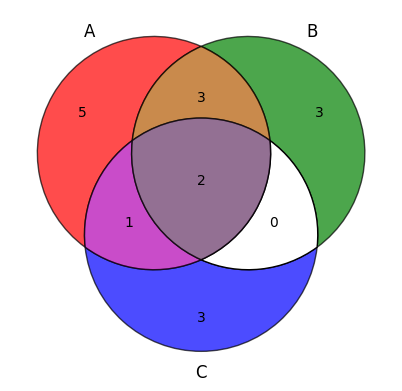

In [31]:
# pip install matplotlib matplotlib-venn
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

def venn3_from_sets(A, B, C, labels=('A','B','C'), alpha=1.0, edgecolor='black'):
    # Conteos por región en el orden de matplotlib-venn:
    # (100, 010, 110, 001, 101, 011, 111)
    counts = (
        len(A - B - C),              # 100: solo A
        len(B - A - C),              # 010: solo B
        len((A & B) - C),            # 110: A∩B sin C
        len(C - A - B),              # 001: solo C
        len((A & C) - B),            # 101: A∩C sin B
        len((B & C) - A),            # 011: B∩C sin A
        len(A & B & C),              # 111: A∩B∩C
    )

    # Dibujamos "no ponderado": todas las áreas = 1 para que existan los 7 parches
    v = venn3(subsets=(1,1,1,1,1,1,1), set_labels=labels, alpha=alpha)

    # Escribimos los conteos reales y pintamos de blanco los ceros
    ids = ['100','010','110','001','101','011','111']
    for rid, val in zip(ids, counts):
        # texto
        t = v.get_label_by_id(rid)
        if t is not None:
            t.set_text(str(val))

        # color del parche
        p = v.get_patch_by_id(rid)
        if p is not None:
            if val == 0:
                p.set_facecolor('white')
                p.set_alpha(1.0)
            # borde para mejor contraste
            p.set_edgecolor(edgecolor)

    return v

# ===== ejemplo de uso =====
if __name__ == "__main__":
    A = {1,2,3,4,5,6,7,8,9,10,11}
    B = {6,7,8,9,10,12,13,14}
    C = {9,10,11,15,16,17}

    venn3_from_sets(A, B, C, labels=('A','B','C'), alpha=0.7)
    plt.show()


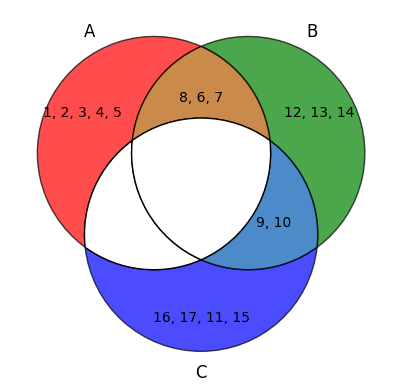

In [33]:

from matplotlib_venn import venn3
import matplotlib.pyplot as plt

def venn3_from_sets_elements(A, B, C, labels=('A','B','C'), alpha=1.0, edgecolor='black'):
    # Regiones como conjuntos
    regiones = {
        '100': A - B - C,         # solo A
        '010': B - A - C,         # solo B
        '110': (A & B) - C,       # A ∩ B sin C
        '001': C - A - B,         # solo C
        '101': (A & C) - B,       # A ∩ C sin B
        '011': (B & C) - A,       # B ∩ C sin A
        '111': A & B & C          # A ∩ B ∩ C
    }

    # Dibujar con áreas iguales
    v = venn3(subsets=(1,1,1,1,1,1,1), set_labels=labels, alpha=alpha)

    # Colocar elementos en lugar de conteos
    for rid, elems in regiones.items():
        # texto
        t = v.get_label_by_id(rid)
        if t is not None:
            if elems:
                t.set_text(", ".join(map(str, elems)))
            else:
                t.set_text("")  # vacío para no mostrar nada

        # color
        p = v.get_patch_by_id(rid)
        if p is not None:
            if not elems:
                p.set_facecolor('white')
                p.set_alpha(1.0)
            p.set_edgecolor(edgecolor)

    return v

# Ejemplo
if __name__ == "__main__":
    A = {1,2,3,4,5,6,7,8}
    B = {6,7,8,9,10,12,13,14}
    C = {9,10,11,15,16,17}

    venn3_from_sets_elements(A, B, C, labels=('A','B','C'), alpha=0.7)
    plt.show()


In [34]:
import re

# ======= PARSER Y EVALUADOR =======
class SetExprParser:
    def __init__(self, A, B, C):
        self.env = {'A': set(A), 'B': set(B), 'C': set(C)}
        self.U = self.env['A'] | self.env['B'] | self.env['C']
        self.tokens = []
        self.pos = 0

    def tokenize(self, s: str):
        # normalizamos operadores verbales y símbolos
        replacements = {
            '∩': ' int ',
            '&': ' int ',
            '∪': ' or ',
            '+': ' or ',
            '|': ' or ',
            '\\': ' not ',
        }
        for k, v in replacements.items():
            s = s.replace(k, v)
        # separar por espacios, paréntesis y palabras clave
        s = re.sub(r'[\(\)]', lambda m: f' {m.group(0)} ', s)
        raw = s.strip().split()
        # normalizar palabras clave
        norm = []
        for t in raw:
            tl = t.lower()
            if tl in ('int',):
                norm.append('INT')
            elif tl in ('or','cup'):
                norm.append('OR')
            elif tl in ('not','minus'):
                norm.append('NOT')
            elif t in ('(',')'):
                norm.append(t)
            elif t in ('A','B','C'):
                norm.append(t)
            else:
                raise ValueError(f"Token no reconocido: {t}")
        self.tokens = norm
        self.pos = 0

    def peek(self):
        return self.tokens[self.pos] if self.pos < len(self.tokens) else None

    def take(self, expected=None):
        tok = self.peek()
        if tok is None:
            return None
        if expected and tok != expected:
            raise ValueError(f"Se esperaba '{expected}' y llegó '{tok}'")
        self.pos += 1
        return tok

    # Gramática (precedencia):
    # expr := union
    # union := diff (OR diff)*
    # diff := inter (NOT inter)*          # diferencia izquierda, asoc. izq.
    # inter := unary (INT unary)*         # intersección
    # unary := NOT unary | primary        # NOT unario = complemento relativo a U
    # primary := IDENT | '(' expr ')'

    def parse(self, s: str):
        self.tokenize(s)
        result = self.parse_union()
        if self.peek() is not None:
            raise ValueError(f"Entrada sobrante a partir de: {self.peek()}")
        return result

    def parse_union(self):
        left = self.parse_diff()
        while self.peek() == 'OR':
            self.take('OR')
            right = self.parse_diff()
            left = left | right
        return left

    def parse_diff(self):
        left = self.parse_inter()
        while self.peek() == 'NOT':
            # 'NOT' binario = diferencia izquierda
            self.take('NOT')
            right = self.parse_inter()
            left = left - right
        return left

    def parse_inter(self):
        left = self.parse_unary()
        while self.peek() == 'INT':
            self.take('INT')
            right = self.parse_unary()
            left = left & right
        return left

    def parse_unary(self):
        if self.peek() == 'NOT':
            # 'NOT' unario = complemento relativo a U
            self.take('NOT')
            x = self.parse_unary()
            return self.U - x
        return self.parse_primary()

    def parse_primary(self):
        tok = self.peek()
        if tok in ('A','B','C'):
            self.take()
            return self.env[tok]
        if tok == '(':
            self.take('(')
            x = self.parse_union()
            self.take(')')
            return x
        raise ValueError(f"Se esperaba A, B, C o '(', llegó: {tok}")


# ======= USO Y PRUEBAS RÁPIDAS =======
if __name__ == "__main__":
    A = {1,2,3,4,5,6,7,8,9,10}
    B = {6,7,8,9,10,11,12}
    C = {9,10,13}

    calc = SetExprParser(A,B,C)

    tests = [
        "A int B",
        "A int B not C",         # ((A∩B)\C)
        "A not B int C",         # A \ (B∩C)
        "not A or B",            # (U\A) ∪ B
        "(A or B) not (A int C)",# (A∪B)\(A∩C)
        "A int (B not C)",       # A ∩ (B\C)
        "A ∩ B \\ C",            # símbolos mezclados
        "A or B or C",
    ]

    for expr in tests:
        res = calc.parse(expr)
        print(f"{expr:30s} -> {sorted(res)}")


A int B                        -> [6, 7, 8, 9, 10]
A int B not C                  -> [6, 7, 8]
A not B int C                  -> [1, 2, 3, 4, 5, 6, 7, 8]
not A or B                     -> [6, 7, 8, 9, 10, 11, 12, 13]
(A or B) not (A int C)         -> [1, 2, 3, 4, 5, 6, 7, 8, 11, 12]
A int (B not C)                -> [6, 7, 8]
A ∩ B \ C                      -> [6, 7, 8]
A or B or C                    -> [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


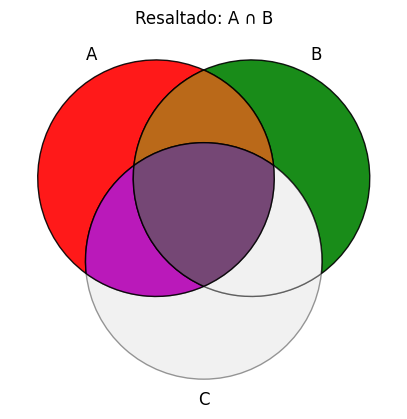

In [38]:
# pip install matplotlib matplotlib-venn
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import re

# ===== parser mínimo para A,B,C =====
class SetExpr:
    def __init__(self, A,B,C):
        self.env = {'A': set(A), 'B': set(B), 'C': set(C)}
        self.U = self.env['A'] | self.env['B'] | self.env['C']
        self.toks = []; self.i = 0

    def _tok(self, s):
        rep = {'∩':' int ', '&':' int ', '∪':' or ', '+':' or ', '|':' or ', '\\':' not '}
        for k,v in rep.items(): s = s.replace(k,v)
        s = re.sub(r'([\(\)])', r' \1 ', s)
        out = []
        for t in s.split():
            tl = t.lower()
            if tl in ('int',): out.append('INT')
            elif tl in ('or','cup'): out.append('OR')
            elif tl in ('not','minus'): out.append('NOT')
            elif t in ('A','B','C','(',')'): out.append(t)
            else: raise ValueError(f"token no reconocido: {t}")
        self.toks, self.i = out, 0

    def _peek(self): return self.toks[self.i] if self.i < len(self.toks) else None
    def _take(self, x=None):
        tok = self._peek()
        if tok is None: return None
        if x and tok != x: raise ValueError(f"se esperaba {x}, llegó {tok}")
        self.i += 1; return tok

    # precedencia: NOT(unario) > INT > NOT(binario, diferencia) > OR
    def parse(self, s):
        self._tok(s); r = self._union()
        if self._peek() is not None: raise ValueError("sobran tokens")
        return r
    def _union(self):
        L = self._diff()
        while self._peek() == 'OR':
            self._take('OR'); R = self._diff(); L = L | R
        return L
    def _diff(self):
        L = self._inter()
        while self._peek() == 'NOT':
            self._take('NOT'); R = self._inter(); L = L - R
        return L
    def _inter(self):
        L = self._unary()
        while self._peek() == 'INT':
            self._take('INT'); R = self._unary(); L = L & R
        return L
    def _unary(self):
        if self._peek() == 'NOT':
            self._take('NOT'); X = self._unary(); return self.U - X
        return self._prim()
    def _prim(self):
        t = self._peek()
        if t in ('A','B','C'): self._take(); return self.env[t]
        if t == '(': self._take('('); x = self._union(); self._take(')'); return x
        raise ValueError("se esperaba A, B, C o '('")

# ===== dibuja venn y resalta expresión =====
def draw_venn3_highlight(A, B, C, expr,
                         labels=('A','B','C'),
                         face_default='#dddddd', alpha_default=0.4,
                         face_highlight=None, alpha_highlight=0.9,
                         edgecolor='black'):
    # regiones disjuntas
    regiones = {
        '100': set(A) - set(B) - set(C),
        '010': set(B) - set(A) - set(C),
        '001': set(C) - set(A) - set(B),
        '110': (set(A)&set(B)) - set(C),
        '101': (set(A)&set(C)) - set(B),
        '011': (set(B)&set(C)) - set(A),
        '111': set(A)&set(B)&set(C),
    }

    # evaluar expresión -> conjunto resultado
    calc = SetExpr(A,B,C)
    S = calc.parse(expr)  # ej: "A int B", "A int B not C", "(A or B) int not C"

    # dibujar no ponderado (todas áreas = 1), sin textos de regiones
    v = venn3(subsets=(1,1,1,1,1,1,1), set_labels=labels, alpha=1.0)
    for rid in regiones:
        t = v.get_label_by_id(rid)
        if t is not None: t.set_text("")  # sin cardinalidades/elementos

    # color por pertenencia de región al resultado
    if face_highlight is None:  # color por defecto de Matplotlib (dejar a su paleta)
        face_highlight = None   # respeta los colores de la lib; solo cambiamos alpha

    for rid, elems in regiones.items():
        p = v.get_patch_by_id(rid)
        if p is None: continue
        # si toda la región está dentro de S, la resaltamos
        if elems and elems.issubset(S):
            if face_highlight is not None:
                p.set_facecolor(face_highlight)
            p.set_alpha(alpha_highlight)
        else:
            if face_default is not None:
                p.set_facecolor(face_default)
            p.set_alpha(alpha_default)
        p.set_edgecolor(edgecolor)

    return v

# ===== ejemplo =====
if __name__ == "__main__":
    A = {1,4,6,7}
    B = {2,4,5,7}
    C = {3,5,6,7}

    plt.figure(figsize=(5,5))
    draw_venn3_highlight(A,B,C, expr="A or B not C", labels=('A','B','C'))
    plt.title("Resaltado: A ∩ B")
    plt.show()


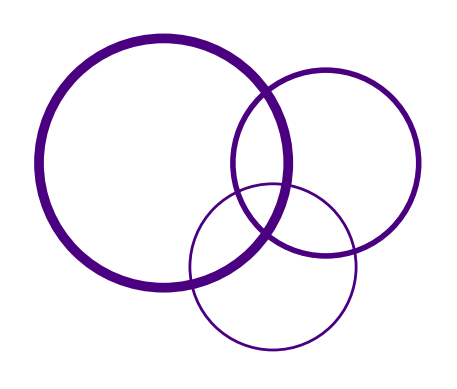

In [24]:
circles = venn3_circles(subsets=(15, 7, 1, 5, 1, 1, 1), linewidth=2, color='indigo')
circles[0].set_lw(7.0)
circles[1].set_lw(4.0)
circles[2].set_lw(2.0)